# Model Building 

###  Importing Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

import copy
warnings.filterwarnings("ignore")

### Read the preprocessed data 

In [2]:
data_factors=pd.read_csv("final_data_factors_main.csv",index_col=0)

In [3]:
data_twitter = pd.read_csv("final_data_twitter_main.csv",index_col=0)

In [4]:
data_twitter_main = data_twitter

In [5]:
data_factors.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,month
0,2018-08-21,NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,8
1,2018-10-11,WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,10
2,2018-08-21,DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,8
3,2018-07-10,GE,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,7
4,2018-09-12,FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2,9


In [6]:
data_twitter.head()


,sentiment_score,stocktwit_tweet,ticker,Date,date,month
0,3,going hesitating chart stable going upward,AMD,2018-09-19,2018-09-19,9
1,3,despite china trade war held thumb,CAT,2018-10-09,2018-10-09,10
2,2,wtf,AVGO,2018-07-12,2018-07-12,7
3,2,new insider filing muller klaus peter transact...,PH,2018-07-19,2018-07-19,7
4,3,bounce tommorrow right thing gtfo,FB,2018-08-23,2018-08-23,8


In [7]:
data_twitter["nullvalue"]=data_twitter['stocktwit_tweet'].isnull()

In [8]:
data_twitter=data_twitter[data_twitter['nullvalue']==False]

In [9]:
data_twitter.shape

(982528, 7)

In [10]:
data_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982528 entries, 0 to 1009957
Data columns (total 7 columns):
sentiment_score    982528 non-null int64
stocktwit_tweet    982528 non-null object
ticker             982528 non-null object
Date               982528 non-null object
date               982528 non-null object
month              982528 non-null int64
nullvalue          982528 non-null bool
dtypes: bool(1), int64(2), object(4)
memory usage: 53.4+ MB


In [11]:
data_twitter['sentiment_score']=data_twitter['sentiment_score'].astype('category')

# Logistic Regression 

In [25]:
X_data=data_twitter['stocktwit_tweet']
Y_data=data_twitter['sentiment_score']

In [26]:
from sklearn.model_selection import train_test_split
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_data, Y_data, test_size = 0.3, random_state=42,stratify=Y_data)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(use_idf=True, ngram_range=(1,3),max_df=0.95)
train_v = tfidf.fit_transform(X_train_t)
test_v = tfidf.transform(X_test_t)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#function to get accuracy and F1 score

def get_result(train,pred):
    count_misclassified = (train != pred).sum()
    print('Misclassified samples:',format(count_misclassified))
    accuracy = accuracy_score(train, pred)
    print('Accuracy:',format(accuracy))
    f1=f1_score(train, pred, average='macro')
    print('F1-Score:',format(f1))


In [29]:
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(train_v,y_train_t)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred_train=logreg.predict(train_v)
y_pred_test=logreg.predict(test_v)


In [31]:
#Train result
get_result(y_train_t,y_pred_train)

Misclassified samples: 185472
Accuracy: 0.7303280607296927
F1-Score: 0.6863597232054182


In [32]:
#Test result
get_result(y_test_t,y_pred_test)

Misclassified samples: 100652
Accuracy: 0.6585278142482502
F1-Score: 0.6029619831766354


# Predicting on Test Data

In [33]:
Test_data_twitter = pd.read_csv("Test_data_twitter.csv",index_col=0)

In [34]:
Test_data_twitter.head()

,stocktwit_tweet,ticker,Date,date
0,exited,CELG,2018-10-25,2018-10-25
1,yall exhaust buyer green candle byeeeeee,AMD,2018-07-13,2018-07-13
2,day trader day,AMD,2018-09-25,2018-09-25
4,weak price action far today not afraid short g...,MU,2018-07-31,2018-07-31
5,continues grow specifically key area like clou...,AMZN,2018-08-04,2018-08-04


In [35]:
X_test_final=Test_data_twitter['stocktwit_tweet']


In [36]:
X_test_final = tfidf.transform(X_test_final)


In [37]:
pred_test_factor = logreg.predict(X_test_final)

In [38]:
len(pred_test_factor)

253695

In [39]:
Test_data_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253695 entries, 0 to 261141
Data columns (total 4 columns):
stocktwit_tweet    253695 non-null object
ticker             253695 non-null object
Date               253695 non-null object
date               253695 non-null object
dtypes: object(4)
memory usage: 9.7+ MB


In [40]:
Test_data_twitter['sentiment_score'] = pred_test_factor

In [41]:
Test_data_twitter

,stocktwit_tweet,ticker,Date,date,sentiment_score
0,exited,CELG,2018-10-25,2018-10-25,2
1,yall exhaust buyer green candle byeeeeee,AMD,2018-07-13,2018-07-13,4
2,day trader day,AMD,2018-09-25,2018-09-25,2
4,weak price action far today not afraid short g...,MU,2018-07-31,2018-07-31,1
5,continues grow specifically key area like clou...,AMZN,2018-08-04,2018-08-04,2
6,not loading right clueless,CLF,2018-08-17,2018-08-17,2
7,crap shoot legit no know going stop pretending...,MU,2018-09-21,2018-09-21,2
8,chart look like setup dip going turtle pace,AMD,2018-09-19,2018-09-19,3
9,amd like sex life dry rn,AMD,2018-09-21,2018-09-21,2
10,finally amd got anti gravity technology nm,AMD,2018-08-24,2018-08-24,2


# Factor data

In [12]:
#data_twitter['date']=data_twitter['Date']
#data_twitter.drop('Date',axis=1,inplace=True)
data_twitter_main['sentiment_score']=data_twitter_main['sentiment_score'].astype('category')
data_twitter_main['ticker']=data_twitter_main['ticker'].str.upper()
data_twitter_main['date']=pd.to_datetime(data_twitter_main['date'].astype(str))
data_factors['date']=pd.to_datetime(data_factors['date'].astype(str))

In [13]:
data_factors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27006 entries, 0 to 27005
Data columns (total 11 columns):
date      27006 non-null datetime64[ns]
ticker    27006 non-null object
SF1       27006 non-null float64
SF2       27006 non-null float64
SF3       27006 non-null float64
SF4       27006 non-null float64
SF5       27006 non-null float64
SF6       27006 non-null float64
SF7       27006 non-null float64
alpha     27006 non-null int64
month     27006 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 2.5+ MB


### Grouping the Twitter data and merging with factor data

In [14]:
group_data = data_twitter_main.groupby(by=['date','ticker'])['sentiment_score'].apply(lambda x:x.value_counts().index[0]).to_frame()


In [15]:
merged_data = pd.merge(data_factors,group_data,  how='left', left_on=['date','ticker'], right_on = ['date','ticker'])
merged_data.fillna(2,inplace=True)
merged_data['sentiment_score']=merged_data['sentiment_score'].astype('category')
merged_data['alpha']=merged_data['alpha'].astype('category')

In [16]:
X=merged_data.drop(['date','alpha','ticker','month'],axis=1)
y=merged_data['alpha']

In [17]:
cat_attr = list(X.select_dtypes("category").columns)
num_attr = list(X.columns.difference(cat_attr))

In [35]:
num_attr

['SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7']

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
from sklearn.model_selection import train_test_split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size = 0.3, random_state=44,stratify=y)

### Model Decision Tree

In [38]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train_m,y_train_m)

y_pred_train_dtc = dtc.predict(X_train_m)
y_pred_test_dtc = dtc.predict(X_test_m)

get_result(y_train_m,y_pred_train_dtc)


Misclassified samples: 0
Accuracy: 1.0
F1-Score: 1.0


In [39]:
get_result(y_test_m,y_pred_test_dtc)

Misclassified samples: 3116
Accuracy: 0.6154036040483831
F1-Score: 0.5693894361347167


### Model Logistic regression

In [40]:
lrc = LogisticRegression()

lrc.fit(X_train_m,y_train_m)

y_pred_train_lrc = lrc.predict(X_train_m)
y_pred_test_lrc = lrc.predict(X_test_m)
get_result(y_train_m,y_pred_train_lrc)


Misclassified samples: 10481
Accuracy: 0.4455670757511638
F1-Score: 0.2661711682125698


In [41]:
get_result(y_test_m,y_pred_test_lrc)


Misclassified samples: 4510
Accuracy: 0.44334732164897556
F1-Score: 0.26251924412680855


### Model K- Nearest Neighbors 

In [42]:
knn = KNeighborsClassifier(n_neighbors=4)  

knn.fit(X_train_m, y_train_m)

y_pred_train_knn = knn.predict(X_train_m)
y_pred_test_knn = knn.predict(X_test_m)
get_result(y_train_m,y_pred_train_knn)


Misclassified samples: 5165
Accuracy: 0.7267774016081253
F1-Score: 0.6852825227039792


In [43]:
get_result(y_test_m,y_pred_test_knn)

Misclassified samples: 3278
Accuracy: 0.5954085411009628
F1-Score: 0.5292235322610628


### Stacking all model  

In [44]:
stack_train = pd.DataFrame([y_pred_train_dtc,y_pred_train_lrc,y_pred_train_knn])
stack_test = pd.DataFrame([y_pred_test_dtc,y_pred_test_lrc,y_pred_test_knn])
stack_train = stack_train.T
stack_test = stack_test.T
stack_train.columns = ['y_pred_train_dtc','y_pred_train_lrc','y_pred_train_knn']
stack_test.columns = ['y_pred_test_dtc','y_pred_test_lrc','y_pred_test_knn']
dtc = DecisionTreeClassifier()

dtc.fit(stack_train,y_train_m)

stacked_pred_train = dtc.predict(stack_train)
stacked_pred_test = dtc.predict(stack_test)

In [45]:
get_result(y_train_m,stacked_pred_train)


Misclassified samples: 0
Accuracy: 1.0
F1-Score: 1.0


In [46]:
get_result(y_test_m,stacked_pred_test)

Misclassified samples: 3116
Accuracy: 0.6154036040483831
F1-Score: 0.5693894361347167


### Random Forest 

In [48]:
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

train_num_attr = Pipeline(steps=[('scaler', MinMaxScaler(feature_range=(0, 1)))])

train_cat_attr = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', train_num_attr, num_attr),
        ('cat', train_cat_attr, cat_attr)])

In [49]:
random_for = Pipeline(steps=[('preprocessor',preprocessor),
                            ('RandomClassifer',RandomForestClassifier())])

In [50]:
random_for.fit(X_train_m,y_train_m)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxScaler(copy=True,
                                                                                feature_range=(0,
                                                                                               1)))],
                                                           verbose=False),
                                                  ['SF1', 'SF2', 'SF3', 'SF4',
                                                   'SF5', 'SF6', 'SF7']),
                                    

In [51]:
y_train_sent_pred = random_for.predict(X_train_m)
y_test_sent_pred =random_for.predict(X_test_m)

In [52]:
X_train_m.shape

(18904, 8)

In [53]:
# how did our model perform?
get_result(y_train_m,y_train_sent_pred)

Misclassified samples: 281
Accuracy: 0.9851354210749048
F1-Score: 0.9840146741368201


In [54]:
get_result(y_test_m,y_test_sent_pred)

Misclassified samples: 2640
Accuracy: 0.6741545297457417
F1-Score: 0.6190494832947526


### Random Forest with hyper parameters

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

# Create the parameter grid based on the results of grid search
param_grid = {
    'RandomClassifer__bootstrap': [True],
    'RandomClassifer__max_depth': [3,7,9,10,12],
    'RandomClassifer__max_features': ['sqrt','auto'],
    'RandomClassifer__min_samples_leaf': [3],
    'RandomClassifer__min_samples_split': [8, 10, 12, 14],
    'RandomClassifer__n_estimators': [80, 100,150,200],
    "RandomClassifer__class_weight":['balanced']
}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=145)
# Create a based model
# Instantiate the grid search model
#rt_forest_grid = RandomizedSearchCV(estimator = random_for, param_distributions = param_grid,
#                        cv = 3, n_jobs = -1, verbose = 2, scoring="f1_macro",)

rt_forest_grid = GridSearchCV(random_for, param_grid=param_grid, cv=kfold,scoring="f1_macro")

#rt_forest_grid = GridSearchCV(random_for, param_grid=param_grid, cv=kfold,scoring="f1_macro")

In [98]:
rt_forest_grid.fit(X_train_m,y_train_m)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=145, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          MinMaxScaler(copy=True,
                                                                            

In [99]:
rt_forest_grid.best_params_

{'RandomClassifer__bootstrap': True,
 'RandomClassifer__class_weight': 'balanced',
 'RandomClassifer__max_depth': 12,
 'RandomClassifer__max_features': 'sqrt',
 'RandomClassifer__min_samples_leaf': 3,
 'RandomClassifer__min_samples_split': 10,
 'RandomClassifer__n_estimators': 150}

In [100]:
y_train_grid_forest = rt_forest_grid.predict(X_train_m)
y_test_grid_forest =rt_forest_grid.predict(X_test_m)

In [101]:
# how did our model perform?
get_result(y_train_m,y_train_grid_forest)

Misclassified samples: 4037
Accuracy: 0.7864473127380449
F1-Score: 0.7630788396812959


In [102]:
# how did our model perform?
get_result(y_test_m,y_test_grid_forest)

Misclassified samples: 2589
Accuracy: 0.6804492717847445
F1-Score: 0.6370584664934706


In [103]:
rt_forest_grid.best_estimator_.named_steps["RandomClassifer"].feature_importances_

array([0.16565721, 0.04101845, 0.21822001, 0.22340016, 0.1650137 ,
       0.04206134, 0.11977595, 0.00133544, 0.00851506, 0.00827326,
       0.00280646, 0.00392297])

In [104]:
feat_labels = list(X_train_m.columns)
feat_labels.remove('sentiment_score')
feat_labels.append('S1')
feat_labels.append('S2')
feat_labels.append('S3')
feat_labels.append('S4')
feat_labels.append('S5')
feat_labels=np.array(feat_labels)


In [105]:
feat_labels

array(['SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7', 'S1', 'S2', 'S3',
       'S4', 'S5'], dtype='<U3')

### Feature Importance

[ 7 10 11  9  8  1  5  6  4  0  2  3]
[ 3  2  0  4  6  5  1  8  9 11 10  7]


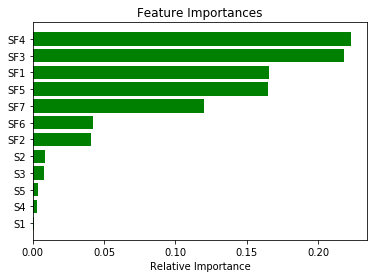

In [106]:



importances = rt_forest_grid.best_estimator_.named_steps["RandomClassifer"].feature_importances_
indices = np.argsort(importances)
print(indices)

indices1 = np.argsort(importances)[::-1]
indices_hl = np.sort(importances)[::-1]
print(indices1)
# print(indices_hl)
pd.DataFrame([feat_labels[indices1],indices_hl])

import matplotlib.pyplot as plt
%matplotlib inline
features = feat_labels

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='green')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# Decision Tree with hyperparameters

In [79]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)


dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], # metric for node splitting  
                 'classifier__max_depth': [6,8,10,12],  #maximum depth of a tree
                 "classifier__min_samples_split": [2, 10, 20 ,30],#minimum number of samples required in a node to be considered for splitting
                 
                 "classifier__min_samples_leaf": [1, 5, 10],# minimum samples required in a leaf
                "classifier__class_weight":['balanced']}

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=kfold,scoring="f1_macro")

dt_grid.fit(X_train_m,y_train_m)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          MinMaxScaler(copy=True,
                                                                            

In [80]:
dt_grid.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 12,
 'classifier__min_samples_leaf': 10,
 'classifier__min_samples_split': 30}

In [81]:
train_pred_dt = dt_grid.predict(X_train_m)
test_pred_dt = dt_grid.predict(X_test_m)

In [82]:
get_result(y_train_m,train_pred_dt)

Misclassified samples: 5003
Accuracy: 0.7353470165044435
F1-Score: 0.6933312135853377


In [83]:
get_result(y_test_m,test_pred_dt)

Misclassified samples: 2750
Accuracy: 0.6605776351518143
F1-Score: 0.6015819582426146


# Learning Curve

In [57]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

size = 2
cv = KFold(size, shuffle=True)

def plot_curve(model,title):
    # instantiate
   # lg = LogisticRegression()

    # fit
    #random_for.fit(X, y)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

### KNN

No handles with labels found to put in legend.


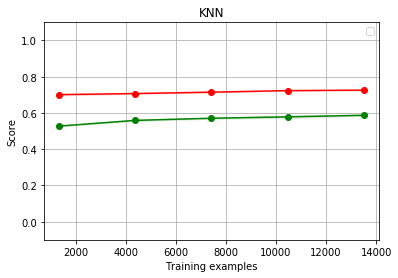

In [77]:
%matplotlib inline
plot_curve(knn,"KNN")

### Logistic Regression

No handles with labels found to put in legend.


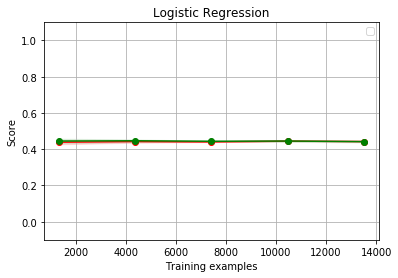

In [76]:
%matplotlib inline
plot_curve(lrc,"Logistic Regression")

### Decision Tree

No handles with labels found to put in legend.


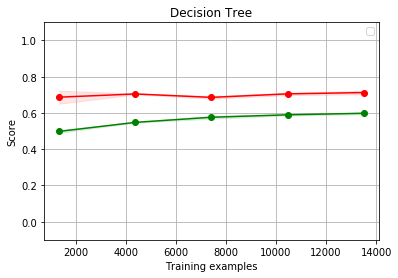

In [108]:
%matplotlib inline
plot_curve(dt_grid,"Decision Tree")

### Random Forest

No handles with labels found to put in legend.


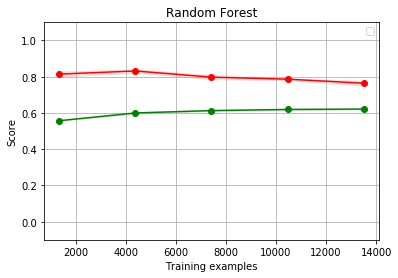

In [109]:
%matplotlib inline
plot_curve(rt_forest_grid,"Random Forest")

# Model without Sentiment Score


In [18]:
X=merged_data.drop(['date','alpha','ticker','month','sentiment_score'],axis=1)
y=merged_data['alpha']

In [19]:
cat_attr = list(X.select_dtypes("category").columns)
num_attr = list(X.columns.difference(cat_attr))

In [20]:
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
train_num_attr = Pipeline(steps=[('scaler', MinMaxScaler(feature_range=(0, 1)))])
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold 

train_cat_attr = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', train_num_attr, num_attr),
        ('cat', train_cat_attr, cat_attr)])

In [21]:
random_without = Pipeline(steps=[('preprocessor',preprocessor),
                            ('RandomClassifer',RandomForestClassifier())])

In [22]:
param_grid = {
    'RandomClassifer__bootstrap': [True],
    'RandomClassifer__max_depth': [3,7,9,10,12],
    'RandomClassifer__max_features': ['sqrt','auto'],
    'RandomClassifer__min_samples_leaf': [3],
    'RandomClassifer__min_samples_split': [8, 10, 12, 14],
    'RandomClassifer__n_estimators': [80, 100,150,200],
    "RandomClassifer__class_weight":['balanced']
}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=142)
# Create a based model
# Instantiate the grid search model
#random_without_s = RandomizedSearchCV(estimator = random_without, param_distributions = param_grid,
 #                        cv = 3, n_jobs = -1, verbose = 2, scoring="f1_macro")

random_without_s = GridSearchCV(random_without, param_grid=param_grid, cv=kfold,scoring="f1_macro")


In [52]:
from sklearn.model_selection import train_test_split
X_train_m_s, X_test_m_s, y_train_m_s, y_test_m_s = train_test_split(X, y, test_size = 0.3, random_state=44,stratify=y)

In [54]:
random_without_s.fit(X_train_m_s,y_train_m_s)

In [139]:
y_train_sent_pred_s = random_without_s.predict(X_train_m_s)
y_test_sent_pred_s =random_without_s.predict(X_test_m_s)

In [140]:
random_without_s.best_params_

{'RandomClassifer__bootstrap': True,
 'RandomClassifer__class_weight': 'balanced',
 'RandomClassifer__max_depth': 12,
 'RandomClassifer__max_features': 'auto',
 'RandomClassifer__min_samples_leaf': 3,
 'RandomClassifer__min_samples_split': 10,
 'RandomClassifer__n_estimators': 100}

In [141]:
# how did our model perform?
get_result(y_train_m_s,y_train_sent_pred_s)

Misclassified samples: 3842
Accuracy: 0.7967625899280576
F1-Score: 0.7730094874928789


In [142]:
get_result(y_test_m_s,y_test_sent_pred_s)

Misclassified samples: 2536
Accuracy: 0.6869908664527277
F1-Score: 0.6419942453444977


In [143]:
random_without_s.best_estimator_.named_steps["RandomClassifer"].feature_importances_

array([0.16931522, 0.0400669 , 0.2274747 , 0.23478363, 0.16476687,
       0.04237142, 0.12122126])

In [144]:
features = X_train_m_s.columns
features

Index(['SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7'], dtype='object')

### Feature Importance

[1 5 6 4 0 2 3]
[3 2 0 4 6 5 1]


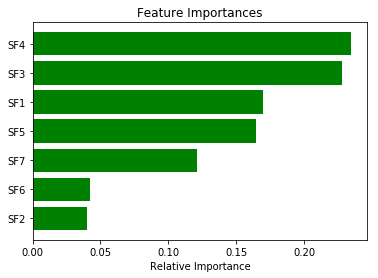

In [145]:



importances = random_without_s.best_estimator_.named_steps["RandomClassifer"].feature_importances_
indices = np.argsort(importances)
print(indices)

indices1 = np.argsort(importances)[::-1]
indices_hl = np.sort(importances)[::-1]
print(indices1)
# print(indices_hl)
pd.DataFrame([X_train_m_s.columns[indices1],indices_hl])

import matplotlib.pyplot as plt
%matplotlib inline
features = X_train_m_s.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='green')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


No handles with labels found to put in legend.


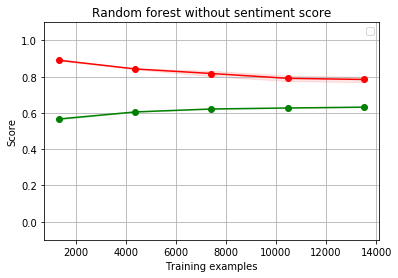

In [58]:
%matplotlib inline
plot_curve(random_without_s,"Random forest without sentiment score")

In [124]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)


dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [6,8,10,12], 
                 "classifier__min_samples_split": [2, 10, 20 ,30],"classifier__min_samples_leaf": [1, 5, 10],
                "classifier__class_weight":['balanced']}

dt_grid_WS = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=kfold,scoring="f1_macro")

dt_grid_WS.fit(X_train_m_s,y_train_m_s)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          MinMaxScaler(copy=True,
                                                                            

In [127]:
y_train_pred_WS = dt_grid_WS.predict(X_train_m_s)
y_test_pred_WS =dt_grid_WS.predict(X_test_m_s)

In [128]:
# how did our model perform?
get_result(y_train_m_s,y_train_pred_WS)

Misclassified samples: 5018
Accuracy: 0.7345535336436733
F1-Score: 0.7017524026908537


In [129]:
get_result(y_test_m_s,y_test_pred_WS)

Misclassified samples: 2899
Accuracy: 0.6421871142927672
F1-Score: 0.595679359986006


No handles with labels found to put in legend.


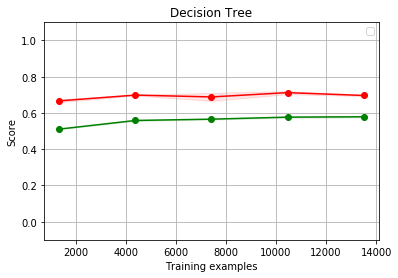

In [130]:
%matplotlib inline
plot_curve(dt_grid_WS,"Decision Tree")

# on whole dataset

In [23]:
random_without_s.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=142, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          MinMaxScaler(copy=True,
                                                                            

In [26]:
y_train_whole_data = random_without_s.predict(X)

In [27]:
get_result(y,y_train_whole_data)

Misclassified samples: 5758
Accuracy: 0.7867881211582611
F1-Score: 0.7620627206183969


# On Test Data with sentiment Score

In [132]:
Test_data_factor = pd.read_csv("Test_data_factors.csv",index_col=0)
Test_data_twitter['date']=pd.to_datetime(Test_data_twitter['date'].astype(str))
Test_data_factor['date']=pd.to_datetime(Test_data_factor['date'].astype(str))
Test_id = Test_data_factor['Id']
Test_data_factor.drop('Id',inplace=True,axis=1)
group_data1 = Test_data_twitter.groupby(by=['date','ticker'])['sentiment_score'].apply(lambda x:x.value_counts().index[0]).to_frame()
merged_data1 = pd.merge(Test_data_factor,group_data1,  how='left', left_on=['date','ticker'], right_on = ['date','ticker'])
merged_data1.fillna(2,inplace=True)
merged_data1['sentiment_score']=merged_data1['sentiment_score'].astype('category')
X_test_last=merged_data1.drop(['date','ticker'],axis=1)


In [133]:

X_test_last

,SF1,SF2,SF3,SF4,SF5,SF6,SF7,sentiment_score
0,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449,2.0
1,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353,2.0
2,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811,2.0
3,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803,3.0
4,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111,2.0
5,0.702094,-0.196188,-0.188337,0.085184,-0.069336,-1.234907,0.611883,4.0
6,-1.039568,-1.593158,0.106040,0.078077,0.451450,0.634200,-0.981084,2.0
7,-0.614720,-0.526076,0.336661,1.794084,-0.157760,-0.401748,-1.700004,2.0
8,-1.041456,1.692789,0.711916,1.236881,-0.654127,1.298980,-1.840617,4.0
9,-0.042736,-1.238728,-0.018280,-0.574350,0.026858,-0.574227,0.311229,2.0


In [134]:
y_final=rt_forest_grid.predict(X_test_last)

In [135]:
final_output1=pd.DataFrame()

In [136]:
final_output1['ID'] = Test_id
final_output1['Alpha']=y_final


In [137]:
final_output1.to_csv("RF_withsentimentscore_final.csv")

# On test data without sentiment score

In [138]:
X_test_last.drop('sentiment_score',inplace=True,axis=1)

In [139]:
y_final_ws=random_without_s.predict(X_test_last)

In [140]:
final_output2=pd.DataFrame()

In [141]:
final_output2['ID'] = Test_id
final_output2['Alpha']=y_final_ws

In [142]:
final_output2.to_csv("RF_withoutsentimentscore_final.csv")